##### [TenserFlow Core](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko)

## 초보자를 위한 빠른 시작

<hr />


### 1. 데이터셋 준비

먼저, **Tensorflow**를 import해야 합니다.

만약 Tensorflow가 설치되어 있지 않다면, `conda install tensorflow`를 먼저 실행합니다.

In [1]:
import tensorflow as tf

**tf.keras.datasets** 모듈은 다양한 데이터셋을 포함하고 활용할 수 있습니다.

다음과 같은 7가지의 데이터셋을 포함하고 있습니다.
1. boston_housing : 보스턴 주택 가격 회귀 데이터셋
2. cifar10 : CIFAR10 작은 이미지 분류 데이터셋
3. cifar100 : CIFAR100 작은 이미지 분류 데이터셋
4. fashion_mnist : Fashion-MNIST 데이터셋
5. imdb : IMDB 감정 분류 데이터셋
6. mnist : MNIST 손글씨 숫자 데이터셋
7. reuters : Reuters 주제 분류 데이터셋

**MNIST 데이터셋**을 로드하고 준비합니다.

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

다운받은 데이터셋을 분석합니다.

In [3]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)



### 2. 데이터 전처리

그리고 샘플 값을 정수에서 부동소수로 변환합니다.

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

이 때 255로 나누는 이유는 컴퓨터는 이미지와 색을 RGB픽셀값으로 저장하고 인식하기 때문에,
R,G,B가 가질 수 있는 0 ~ 255 사이의 숫자를 **정규화**하기 위해서 255로 나누게 됩니다.

* 정규화 : 데이터가 가진 스케일들이 크게 차이가 날 경우 생기는 문제를 방지하기 위해 스케일링을 해주는 방식
    * 목표 : 모든 데이터가 같은 정도의 중요도로 반영되게 해주는 것
    * 방법 : Min-Max Normalization (최소-최대 정규화) / Z-Score Normalization (Z-점수 정규화)

In [5]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

x_train[0]에 해당하는 이미지를 확인하기 위해 matplotlib을 import합니다.

이 때 module이 없다면, `conda install matplotlib`을 통해 설치를 합니다.

In [6]:
import matplotlib.pyplot as plt

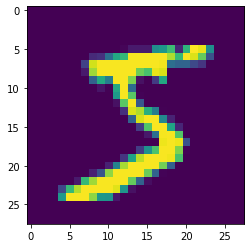

In [7]:
plt.imshow(x_train[0])


### 3. 모델 구성

Sequential() 클래스를 이용하여 신경망 모델을 순서대로 구성합니다.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

총 4개의 레이어로 구성된 신경망 모델로,

* 1번째 레이어는 2차원 배열(**28X28 픽셀**)의 이미지를 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다.
* 2번째 레이어는 펼친 784개의 값을 128개의 값으로 인코딩 해주는 과정으로, 활성함수는 ReLU를 사용하였습니다.
* 3번째 레이어는 128개의 뉴런 중 무작위로 20%를 무시합니다.
* 4번째 레이어는 무시된 값을 제외한 뉴런 중 10개의 값을 출력하는데, 활성함수는 softmax를 사용하였습니다.(MNIST데이터셋은 0 ~ 9의 총 10개의 클래스가 존재하므로)


### 4. 모델 컴파일

모델을 모두 작성했으니, 컴파일해줍니다.

모델의 손실함수를 정의하고, 정한 손실함수로 얻은 손실값을 통해 모델의 파라미터를 조정하는 옵티마이저 등을 정의합니다.

* 손실함수(Loss Function) : 훈련하는 동안 모델의 오차를 측정합니다. 모델 학습이 올바른 방향으로 향하도록 이 함수를 최소화하해야 합니다.
* 옵티마이저(Optimizer) : 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
* 지표(Metrics) : 훈련 단계와 테스트 단계를 모니터링 하기 위해 사용됩니다. (정확도 : 올바르게 분류된 이미지 비율)

In [9]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

모델의 학습 방법 중 Adam 옵티마이저를 사용했으며, 다중 클래스 분류를 다루고 있기 때문에 categorical_crossentropy를 손실함수로 사용합니다.

이 손실함수는 softmax 활성화함수와 짝을 이루는 손실함수입니다.

그리고, 모델 평가 지표로는 정확도를 구하는 accuracy를 추가합니다.


### 5. 최종 모델 구조 확인

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 6. 모델 훈련

모델을 정의하고 컴파일도 완료했으니, 학습을 시킬 차례입니다.
* 입력 데이터 : x_train
* 정답 데이터 : y_train
* epochs : 학습 반복 횟수
* batch_size : 몇 개의 샘플로 가중치를 계산할 것인지(100가지에서 batch_size가 100이면 전체를 다 계산)

In [11]:
model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 790us/step - loss: 0.2943 - accuracy: 0.9147 - val_loss: 0.1396 - val_accuracy: 0.9568
Epoch 2/5
1875/1875 [==============================] - 1s 695us/step - loss: 0.1464 - accuracy: 0.9564 - val_loss: 0.1025 - val_accuracy: 0.9699
Epoch 3/5
1875/1875 [==============================] - 1s 686us/step - loss: 0.1069 - accuracy: 0.9676 - val_loss: 0.0859 - val_accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 1s 689us/step - loss: 0.0898 - accuracy: 0.9726 - val_loss: 0.0783 - val_accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 1s 711us/step - loss: 0.0757 - accuracy: 0.9767 - val_loss: 0.0777 - val_accuracy: 0.9780


테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다.

verbose : 학습 중 출력되는 문구를 설정하는 파라미터입니다.
* 0 : 출력 X
* 1 : 훈련의 진행도를 보여주는 진행 막대를 나타냅니다.
* 2 : 손실 정보를 출력해줍니다.

In [12]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0777 - accuracy: 0.9780


[0.07769541442394257, 0.9779999852180481]

### 7. 훈련 결과 시각화

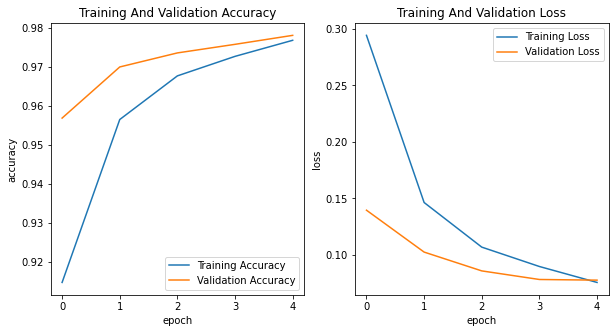

In [13]:
epochs = 5
plt.figure(figsize=(10, 5))

# 1. Training And Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(epochs), model_history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

# 2. Training And Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(epochs), model_history.history['loss'], label='Training Loss')
plt.plot(range(epochs), model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Loss')
plt.show()

### 8. Neural Network

위의 모델에서 단순히 레이어를 여러층으로 나누어 딥러닝을 시도해봅니다.
데이터와 파라미터는 모두 동일한 채로 학습모델만 변경하여 예측률을 상승시킬 수 있는지 확인하였습니다.

In [14]:
model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_nn.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [15]:
model_nn_history = model_nn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2859 - accuracy: 0.9156 - val_loss: 0.1224 - val_accuracy: 0.9628
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1212 - accuracy: 0.9668 - val_loss: 0.0914 - val_accuracy: 0.9739
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0844 - accuracy: 0.9764 - val_loss: 0.1009 - val_accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0665 - accuracy: 0.9814 - val_loss: 0.1004 - val_accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0528 - accuracy: 0.9844 - val_loss: 0.0770 - val_accuracy: 0.9784


In [16]:
model_nn.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0770 - accuracy: 0.9784


[0.0769704207777977, 0.9783999919891357]

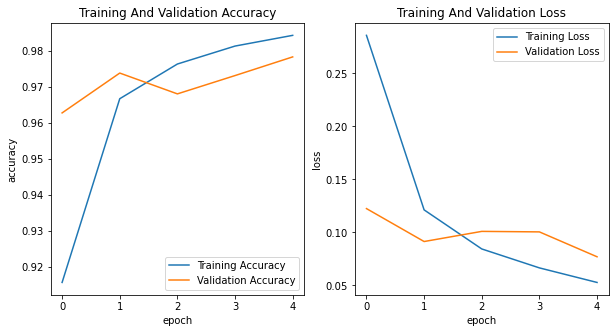

In [17]:
epochs = 5
plt.figure(figsize=(10, 5))

# 1. Training And Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(epochs), model_nn_history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), model_nn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

# 2. Training And Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(epochs), model_nn_history.history['loss'], label='Training Loss')
plt.plot(range(epochs), model_nn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Loss')
plt.show()